$$Diego \space Castillo \space Reyes$$

<h1 align="center">Algoritmo de Grover</h1>
Realiza el algoritmo de grover para encontrar el numero 2 en binario 010, introduciendo del numero 0 al 7

In [13]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt

In [14]:
n = 3
# define the device
dev = qml.device("default.qubit", wires=n, shots=1024)

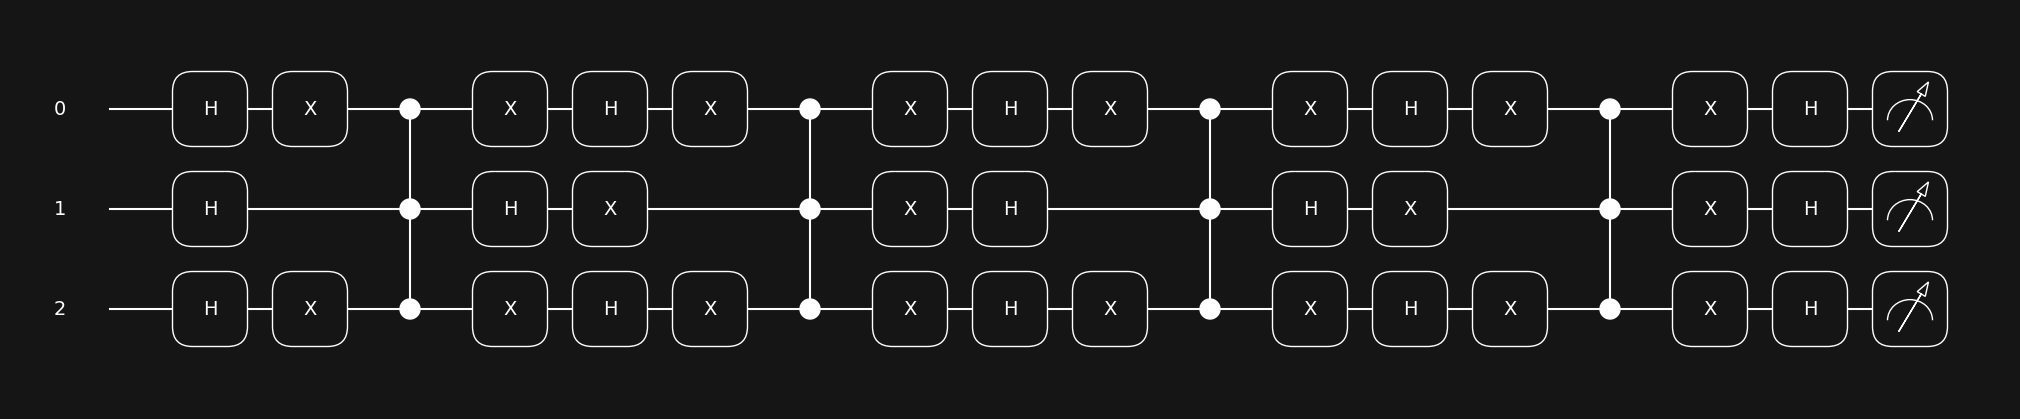

In [15]:
# define the circuit
@qml.qnode(dev)
def circuit(n):
    # set the number of iterations for Grover's algorithm
    k = int(np.pi *  np.sqrt(2**n) / 4)

    # prepare the search space
    for i in range(n):
        qml.Hadamard(wires=i)

    # perform Grover's algorithm
    for _ in range(k):
        # reflection oracle (it has to change for different states)
        qml.PauliX(wires=0)
        qml.PauliX(wires=2)
        qml.CCZ(wires=[0, 2, 1])
        qml.PauliX(wires=0)
        qml.PauliX(wires=2)

        # diffuser
        for i in range(n):
            qml.Hadamard(wires=i)
            qml.PauliX(wires=i)
        
        qml.ctrl(qml.PauliZ(n - 1), control=[i for i in range(n-1)])
        
        for i in range(n):
            qml.PauliX(wires=i)
            qml.Hadamard(wires=i)

    return qml.counts()

# draw the circuit
qml.drawer.use_style("black_white_dark")
fig, ax = qml.draw_mpl(circuit)(n)
plt.show()

Resultados del conteo:
{'000': 6, '001': 10, '010': 957, '011': 14, '100': 8, '101': 10, '110': 6, '111': 13}


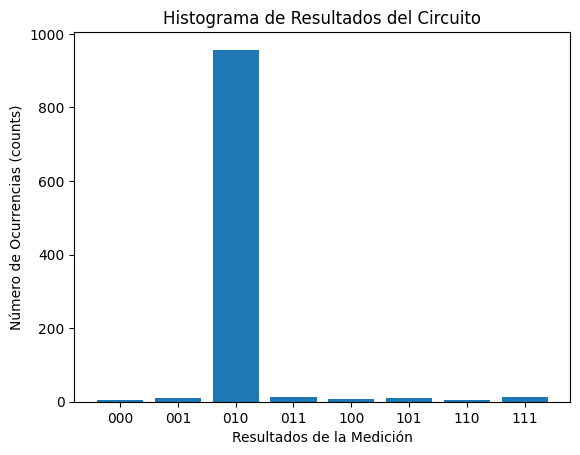

In [16]:
counts = circuit(n)

print("Resultados del conteo:")
print(counts)

# Prepare data for histogram
labels = counts.keys()
values = counts.values()

plt.bar(labels, values)
plt.xlabel("Resultados de la Medición")
plt.ylabel("Número de Ocurrencias (counts)")
plt.title("Histograma de Resultados del Circuito")
plt.show()